# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

*В проектной работе представлены данные сервиса Яндекс Недвижимость с информацией об объявлениях о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за несколько лет. Необходимо провести предобработку данных, а также провести исследовательский анализ и выявить параметры, влияющие на цену объекта недвижимости.*

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


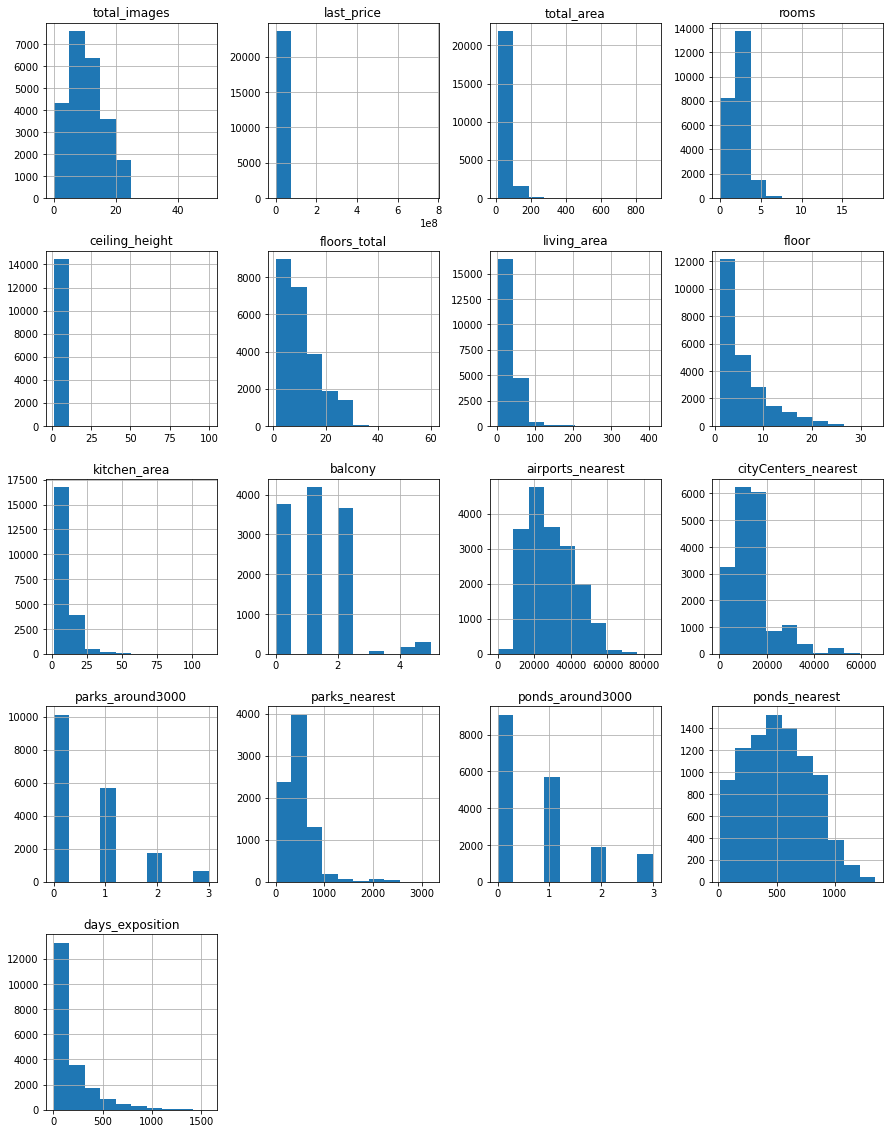

In [2]:
data.hist(figsize=(15, 20));

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод**
Импортировали библиотеки pandas и matplotlib, открыли файл с таблицей с данными, обозначив его data. Вывели гистограммы по всем количественным параметрам. Глядя на них, можно сделать вывод, что есть выбросы, аномальные значения. Также вывели общую информацию о датафрейме: он содержит 23699 строк и 22 столбца, получили информацию о типе данных в строках и в каких столбцах есть пропуски. В ходе дальнейшей предобработки, по возможности, выявленные недостатки будут устранены.

### Выполните предобработку данных

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Сперва посчитали пропуски по столбцам в  датафрейме. Наиболшее количество пропусков содержат столбцы "апартаменты"(20924), "расстояние до ближайшего парка"(15620), "расстояние до ближайшего водоема"(14589) и "число балконов"(11519) меньше пропусков в столбцах "высота потолков"(9195), "расстояние до ближайшего аэропорта"(5542), "расстояние до центра города"(5519), "число парков в радиусе 3 км"(5518), "число водоёмов в радиусе 3 км"(5518), "сколько дней было размещено объявление"(3181), "площадь кухни"(2278) и "жилая площадь"(1903). Наименьшее количество пропусков в столбцах "всего этажей в доме" и "название населенного пункта"(49).

Привели названия столбцов к общему стилю:

In [5]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around_3000', 'ponds_around3000':'ponds_around_3000'})

Пропкски в столбце "балконы" заменили на "0":

In [6]:
data['balcony'] = data['balcony'].fillna(0)

Заменили пропуски в столбце "высота потолков" на медианное значение:

In [7]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [8]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Изучив содержимое столбца "апартаменты", сделали вывод, что пропуски в данном столбце нужно заменить на значение "False":

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)

В столбцах с информацией о наличии парков и водоемов в радиусе 3 км заменили пропуски на "0":

In [10]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)

In [11]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)

В столбце "название населенного пункта" заменили пропуски на "unknown":

In [12]:
data['locality_name'] = data['locality_name'].fillna('unknown')

Посчитали медианное значение, показывающее, какую долю составляет жилая площади от общей. Заменили пропуски в столбце "жилая площадь" с учетом этого значения, т.к. общая площадь известна для всех объектов:

In [13]:
ratio_liv_tot_area = round((data['living_area']/data['total_area']).median(), 2)
ratio_liv_tot_area

0.57

In [14]:
data['living_area'] = data['living_area'].fillna(data['total_area']*ratio_liv_tot_area)

Выведем информацию о пропусках снова. Количество пропусков заметно снизилось после их обработки:

In [15]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000           0
parks_nearest           15620
ponds_around_3000           0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Причиной пропусков в датафрейме может быть сбой в автоматизированной системе сбора информации. Также пользователь мог не указать некоторые данные по желанию или по незнанию соответствующей информации.

Были рассмотрены типы данных по разным столбцам. Некоторые из них было решено изменить на более подходящие для удобства дальнейших исследований.

Значения в столбце "первый день публикации" были типа object. Переведем данные в формат даты:

In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Значения из столбца "цена на момент снятия с публикации" имели тип float, перевели в целочисленные значения:

У значений из столбца "апартаменты" поменяли тип с object на булев тип, т.к. они принимают значения True/False:

Значения из столбца "балконы" имели тип float, изменим его на целочисленные значения. Точно также поступили со зачениями из столбцов "число парков в радиусе 3 км" и "число водоемов в радиусе 3 км".

In [17]:
data = data.astype({'last_price':'int', 'is_apartment': 'bool', 'balcony': 'int', 'parks_around_3000':'int', 'ponds_around_3000':'int'})

Переходим к обработке неявных дубликатов. Вывели уникальные значения столбца "название населенного пункта".

In [18]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Первое, что бросается в глаза, это то, что присутствуют сочетания названий одних и тех же населенных пунктов с "посёлок" и "поселок". Чтобы избавиться от таких дубликатов заменим все "ё" на "е":

In [19]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

Также есть проблема: встречаются названия одних и тех же населенных пунктов в сочнтании либо с "городской поселок", либо с "поселок городского типа". Найденные дубликаты приведем к общему виду, заменив "городской поселок" на "поселок городского типа":

In [20]:
data['locality_name'] = data['locality_name'].replace('Мурино', 'поселок Мурино')
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')
data['locality_name'] = data['locality_name'].replace('деревня Федоровское', 'городской поселок Федоровское')
data['locality_name'] = data['locality_name'].replace('село Никольское', 'Никольское')
data['locality_name'] = data['locality_name'].replace('городской поселок Рощино', 'поселок городского типа Рощино')
data['locality_name'] = data['locality_name'].replace('городской поселок Павлово', 'поселок городского типа Павлово')
data['locality_name'] = data['locality_name'].replace('городской поселок Большая Ижора', 'поселок городского типа Большая Ижора')
data['locality_name'] = data['locality_name'].replace('городской поселок Лесогорский', 'поселок городского типа Лесогорский')
data['locality_name'] = data['locality_name'].replace('поселок Рябово', 'поселок городского типа Рябово')
data['locality_name'] = data['locality_name'].replace('городской поселок Мга', 'поселок городского типа Мга')
data['locality_name'] = data['locality_name'].replace('поселок станции Вещево', 'поселок при железнодорожной станции Вещево')
data['locality_name'] = data['locality_name'].replace('городской поселок Назия', 'поселок городского типа Назия')
data['locality_name'] = data['locality_name'].replace('поселок Гарболово', 'деревня Гарболово')
data['locality_name'] = data['locality_name'].replace('поселок станции Приветнинское', 'поселок при железнодорожной станции Приветнинское')
data['locality_name'] = data['locality_name'].replace('поселок станции Громово', 'поселок Громово')
data['locality_name'] = data['locality_name'].replace('городской поселок Советский', 'поселок городского типа Советский')

In [21]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'городской поселок Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Св

**Вывод**
В ходе предобработки данных были обработаны пропуски, там где было это возможно. Приведены все названия столбцов к общему стилю. Для удобства дальнейших исследований типы некоторых столбцов были изменены на корректные. Обработаны найденные неявные дубликаты.

### Добавьте в таблицу новые столбцы

В датафрейм были добавлены дополнительные столбцы. Они нужны для проведения исследовательского анализа. Столбец "цена одного квадратного метра" был получен путем деления значений из столбца "цена на момент снятия с публикации" на значения из столбца "общая площадь":

In [22]:
data['price_per_square_meter'] = round((data['last_price']/data['total_area'])/1000000, 2)

Добавлены столбцы "день публикации", "месяц публикации" и "год публикации":

In [23]:
data['exposition_day'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year

Добавлен столбец "тип этажа квартиры". В зависимости от значения этажа присваивался тип "первый"/"последний"/"другой":

In [24]:
def apartment_floor_kind(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'
data['floor_kind'] = data.apply(apartment_floor_kind, axis=1)

Добавлен столбец "расстояние до центра города в километрах":

In [25]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

Проверили, что столбцы добавлены и имеют верные значения:

In [26]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,exposition_day,exposition_month,exposition_year,floor_kind,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,...,482.0,2,755.0,NaN,0.12,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.60,1,False,...,NaN,0,NaN,81.0,0.08,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.30,4,False,...,90.0,2,574.0,558.0,0.09,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,90.63,9,False,...,84.0,3,234.0,424.0,0.41,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,...,112.0,1,48.0,121.0,0.10,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

#  Oбщая площадь

Изучим разные параметры объектов недвижимости. Для всех параметров посторим гистограмму, для более детального выявления выбросов также построим диаграмму размаха, а чтобы лучше интерпретировать графики воспользуемся описанием данных столбца методом describe(). Начнем со значений "общая площадь".

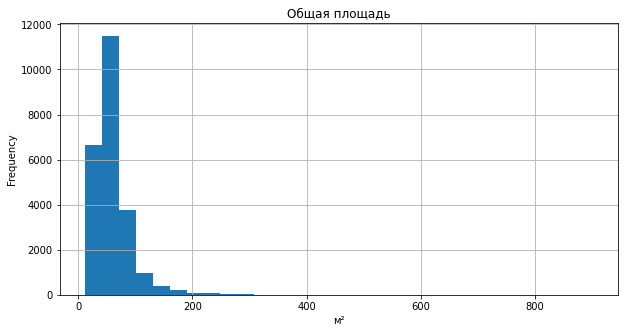

In [27]:
data['total_area'].plot(kind='hist', bins=30, figsize=(10, 5), grid=True, title='Общая площадь')
plt.xlabel('м²');

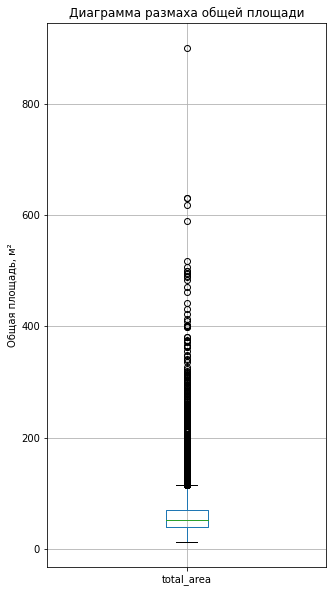

In [28]:
plt.figure(figsize=(5, 10))
data.boxplot(column=['total_area'])
plt.title('Диаграмма размаха общей площади');
plt.ylabel('Общая площадь, м²');

In [29]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Минимальное значение общей площади объектов недвижимости - 12 кв. м., максимальное - 900 кв.м. Чтобы посчитать верхний предел значений и отсеять выбросы, воспользуемся формулой Q(3)+1.5IQR. Получилось значение 114 кв.м. Удалим данные, которые больше 114 кв.м.

In [30]:
good_data = data.query('total_area <= 300')
round((len(data[data['total_area'] > 300])/len(data))*100, 2)

0.26

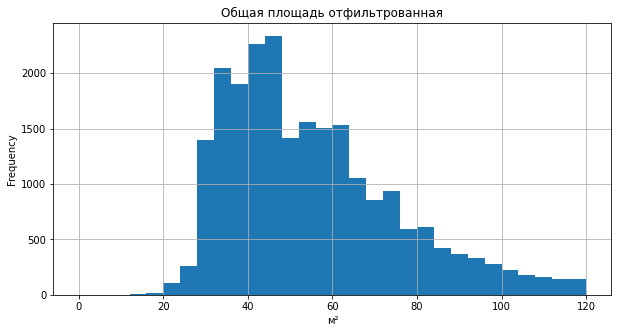

In [31]:
good_data['total_area'].plot(kind='hist', bins=30, figsize=(10, 5), grid=True, range=(0, 120), title='Общая площадь отфильтрованная');
plt.xlabel('м²');

In [32]:
good_data['total_area'].median()

52.0

Так гистограмма выглядит лучше. Можно сделать вывод, что больше всего предложений квартир с площадью примерно от 30 кв.м. до 69 кв.м. Медианное значение общей площади квартиры 52 кв.м. Наиболее часто встречаются квартиры с общей площадью 45 кв.м. Совсем реже встречаются квартиры с общей площадью меньше 30 кв.м. и больше 90 кв.м.

# Жилая площадь

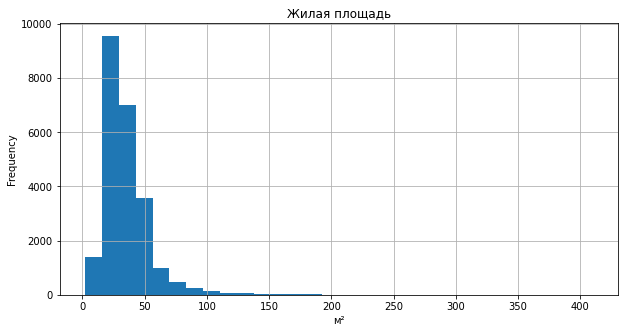

In [33]:
data['living_area'].plot(kind='hist', bins=30, figsize=(10, 5), grid=True, title='Жилая площадь');
plt.xlabel('м²');

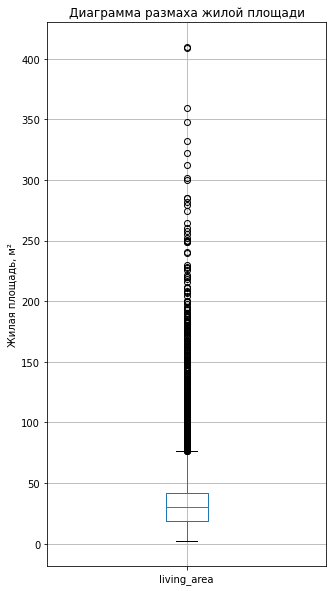

In [34]:
plt.figure(figsize=(5, 10))
data.boxplot(column=['living_area']);
plt.title('Диаграмма размаха жилой площади');
plt.ylabel('Жилая площадь, м²');

In [35]:
data['living_area'].describe()

count    23699.000000
mean        34.589095
std         22.350250
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

По описательным данным видно, что минимальное значение жилой площади объекта недвижимости - 2 кв.м., а максимальное - 409. Среднее значение - 34.6. Также по формуле (Q(3)+1.5IQR) расчитали верхний порог для выбросов и убрали эти значения.

In [36]:
good_data = data.query('living_area <= 175')
round((len(data[data['living_area'] > 175])/len(data))*100, 2)

0.32

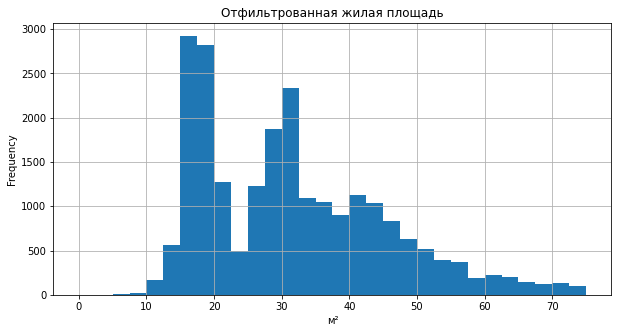

In [37]:
good_data['living_area'].plot(kind='hist', bins=30, figsize=(10, 5), range=(0, 75), grid=True, title='Отфильтрованная жилая площадь');
plt.xlabel('м²');

In [38]:
good_data['living_area'].median()

30.0

Больше всего предложений квартир с жилой площадью примерно от 15 кв.м. до 48 кв.м. Медианное значение жилой площади квартиры 30 кв.м. Наиболее часто встречаются квартиры с жилой площадью примерно 17 кв.м. Совсем реже встречаются квартиры с жилой площадью меньше 15 кв.м. и больше 50 кв.м.

# Площадь кухни

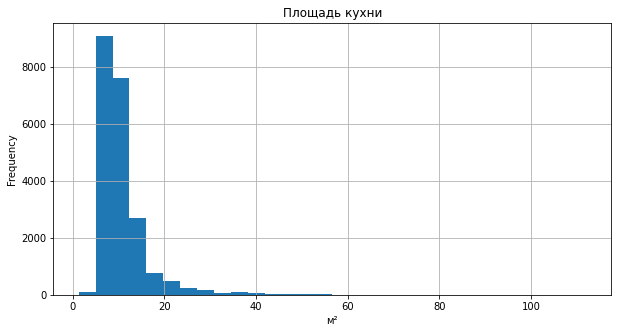

In [39]:
data['kitchen_area'].plot(kind='hist', bins=30, figsize=(10, 5), grid=True, title='Площадь кухни');
plt.xlabel('м²');

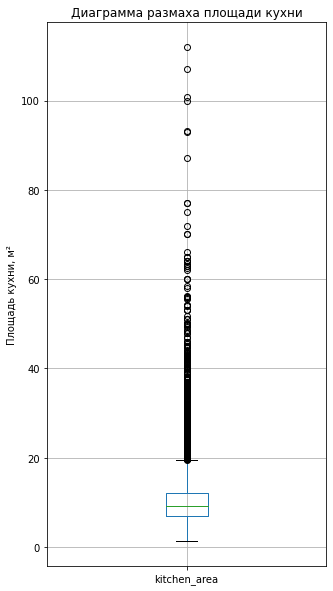

In [40]:
plt.figure(figsize=(5, 10))
data.boxplot(column=['kitchen_area']);
plt.title('Диаграмма размаха площади кухни');
plt.ylabel('Площадь кухни, м²');

In [41]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Минимальное значение площади кухни объекта недвижимости - 1.3 кв.м., а максимальное - 112. Среднее значение - 10.6 кв.м. По формуле (Q(3)+1.5IQR) расчитали верхний порог для выбросов и убрали эти значения.

In [42]:
good_data = data.query('kitchen_area <= 40')
round((len(data[data['kitchen_area'] > 40])/len(data))*100, 2)

0.55

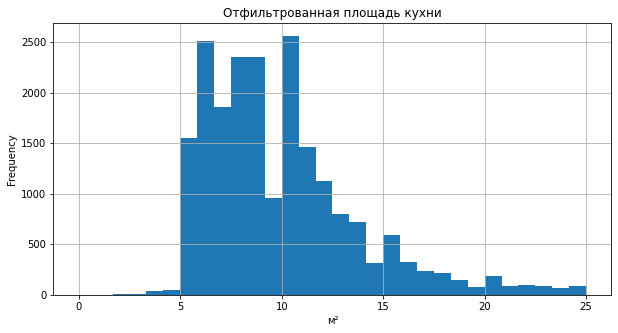

In [43]:
good_data['kitchen_area'].plot(kind='hist', bins=30, figsize=(10, 5), grid=True, range=(0, 25), title='Отфильтрованная площадь кухни');
plt.xlabel('м²');

In [44]:
good_data['kitchen_area'].median()

9.1

Из полученных данных видно, что большинство объектов недвижимости с площадью кухни от 5 кв.м. до 12 кв.м. Самая распространенная площадь кухни около 8 кв.м. Редко встречаются куни с площадью меньше 5 кв.м. и больше 15 кв. м.

# Цена на момент снятия с публикации

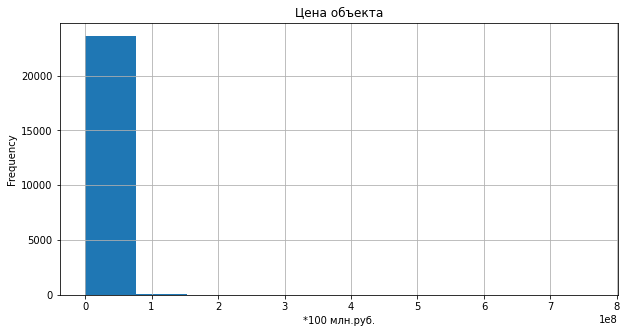

In [45]:
data['last_price'].plot(kind='hist', bins=10, figsize=(10, 5), grid=True, title='Цена объекта');
plt.xlabel('*100 млн.руб.');

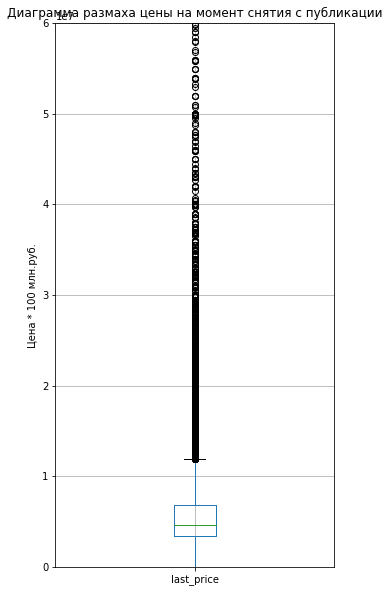

In [46]:
plt.figure(figsize=(5, 10))
data.boxplot(column=['last_price']);
plt.ylim(0, 60000000)
plt.title('Диаграмма размаха цены на момент снятия с публикации');
plt.ylabel('Цена * 100 млн.руб.');

In [47]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Минимальное значение цены на объект недвижимости - 12190 руб., максимальное - 763 млн.руб., среднее - 6.5 млн.руб. Отбрасываем значения, которые больше 11.9 млн.руб.

In [48]:
good_data = data.query('last_price <= 50000000')
round((len(data[data['last_price'] > 50000000])/len(data))*100, 2)

0.55

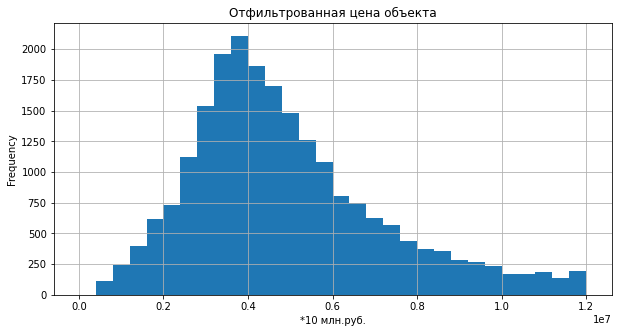

In [49]:
good_data['last_price'].plot(kind='hist', bins=30, figsize=(10, 5), range=(0, 12000000), grid=True, title='Отфильтрованная цена объекта');
plt.xlabel('*10 млн.руб.');

In [50]:
good_data['last_price'].median()

4600000.0

Чаще всего встречаются квартиры, стоимостью от 2,5 млн.руб. до 6.5 млн. руб. Наибольшее число квартир имеет цену около 3.5 млн.руб. Медианное значение стоимости объектов недвижимости - 4.6. млн.руб.

# Количество комнат

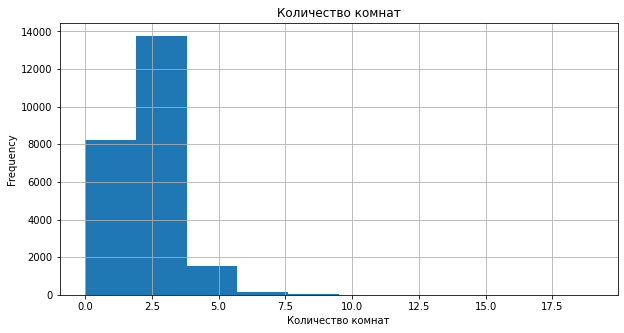

In [51]:
data['rooms'].plot(kind='hist', bins=10, figsize=(10, 5), grid=True, title='Количество комнат');
plt.xlabel('Количество комнат');

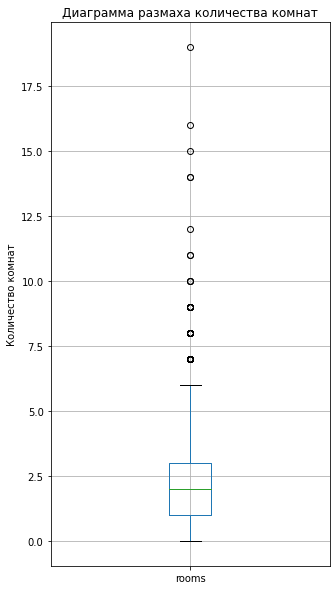

In [52]:
plt.figure(figsize=(5, 10))
data.boxplot(column=['rooms'])
plt.title('Диаграмма размаха количества комнат');
plt.ylabel('Количество комнат');

In [53]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Минимальное количество комнат - 0, так могут быть обозначены квартиру-студии, максимальное значение - 19 комнат, среднее значение - 2 комнаты. Отбросим значения количества комнат больше 6.

In [54]:
good_data = data.query('0 < rooms <= 6')
round((len(data[(data['rooms'] > 6) | (data['rooms'] == 0)])/len(data))*100, 2)

1.21

In [55]:
good_data['rooms'].unique()

array([3, 1, 2, 4, 5, 6])

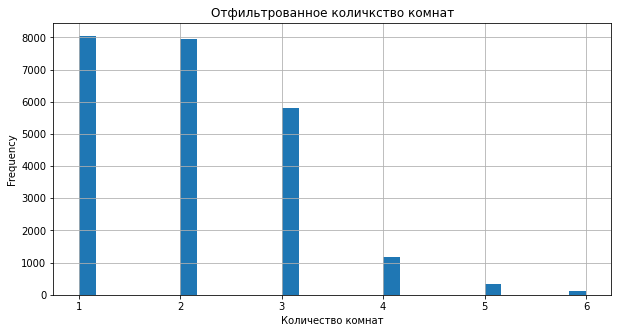

In [56]:
good_data['rooms'].plot(kind='hist', bins=30, figsize=(10, 5), grid=True, title='Отфильтрованное количкство комнат');
plt.xlabel('Количество комнат');

In [57]:
good_data['rooms'].median()

2.0

Чаще всего встречаются одно, двух и трехкомнатные квартиры. Редко встречаются квартиры-студии, четырех-, пяти- и шестикомнатные квартиры. Лидируют одно и двухкомнатные квартиры с небольшой разницей. Медианное количество комнат - 2.

# Высота потолков

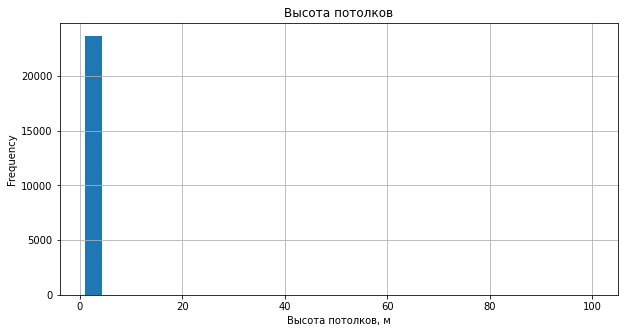

In [58]:
data['ceiling_height'].plot(kind='hist', bins=30, figsize=(10, 5), grid=True, title='Высота потолков');
plt.xlabel('Высота потолков, м');

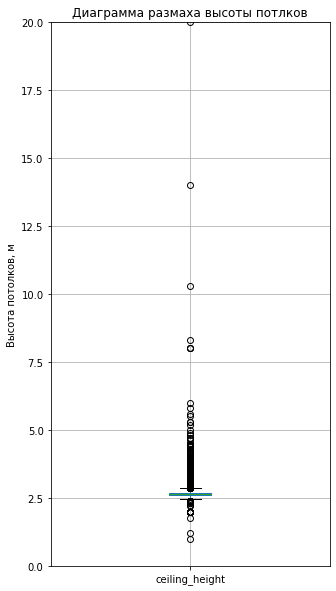

In [59]:
plt.figure(figsize=(5, 10))
data.boxplot(column=['ceiling_height']);
plt.ylim(0, 20)
plt.title('Диаграмма размаха высоты потлков');
plt.ylabel('Высота потолков, м');

In [60]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Минимальное значение высоты потолков - 1, а максимальное - 100. Это очень странно. И таких странных значений довольно много.

In [61]:
data.sort_values(by='ceiling_height', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,exposition_day,exposition_month,exposition_year,floor_kind,city_centers_nearest_km
22869,0,15000000,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,...,223.0,3,30.0,19.0,0.60,2,7,2018,последний,8.0
3148,14,2900000,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,...,NaN,0,NaN,NaN,0.04,0,11,2018,другой,NaN
22336,19,9999000,92.4,2019-04-05,2,32.0,6.0,55.5,5,False,...,NaN,3,511.0,NaN,0.11,4,4,2019,другой,4.0
21377,19,4900000,42.0,2017-04-18,1,27.5,24.0,37.7,19,False,...,NaN,0,NaN,61.0,0.12,1,4,2017,другой,10.0
4876,7,3000000,25.0,2017-09-27,0,27.0,25.0,17.0,17,False,...,NaN,0,NaN,28.0,0.12,2,9,2017,другой,NaN
17857,1,3900000,56.0,2017-12-22,3,27.0,5.0,33.0,4,False,...,NaN,0,NaN,73.0,0.07,4,12,2017,другой,16.0
5246,0,2500000,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,...,NaN,0,NaN,540.0,0.05,4,10,2017,другой,NaN
20478,11,8000000,45.0,2017-07-18,1,27.0,4.0,22.0,2,False,...,NaN,3,449.0,429.0,0.18,1,7,2017,другой,3.0
22938,14,4000000,98.0,2018-03-15,4,27.0,2.0,73.0,2,True,...,NaN,0,NaN,27.0,0.04,3,3,2018,последний,NaN
5807,17,8150000,80.0,2019-01-09,2,27.0,36.0,41.0,13,False,...,NaN,3,80.0,38.0,0.10,2,1,2019,другой,20.0


Заменим выбивающиеся значения высоты потолка на медиану.

In [62]:
median_ceiling_height=data['ceiling_height'].median()
median_ceiling_height

2.65

In [63]:
data.loc[(data['ceiling_height'] > 5)|(data['ceiling_height'] < 2.5), 'ceiling_height'] = median_ceiling_height

Отбросили значения высоты потолков, которые превышают 2.8 м.

In [64]:
good_data = data.query('ceiling_height <= 3.5')
round((len(data[data['ceiling_height'] > 3.5])/len(data))*100, 2)

1.13

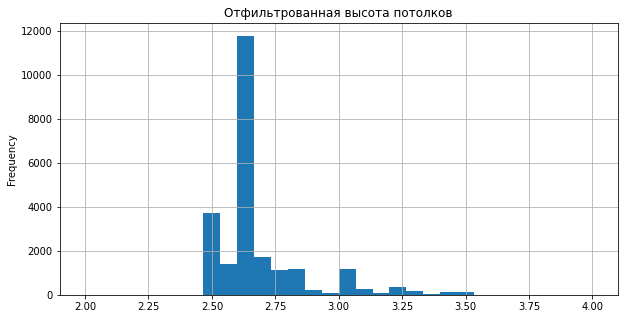

In [65]:
good_data['ceiling_height'].plot(kind='hist', bins=30, figsize=(10, 5), grid=True, range=(2, 4), title='Отфильтрованная высота потолков');


In [66]:
good_data['ceiling_height'].median()

2.65

Наибольшее число квартир с высотой потолков около 2.65 м. Реже встерчаются к вартиры с потолками, высотой 2.5, 2.55, 2.6, 3.7, 2.75  и 2.8 м. Медиана равна 2.65 м.  

# Тип этажа квартиры

Посчитали количестов всех типов этажей и построили столбчатую диаграмму.

In [67]:
data['floor_kind'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_kind, dtype: int64

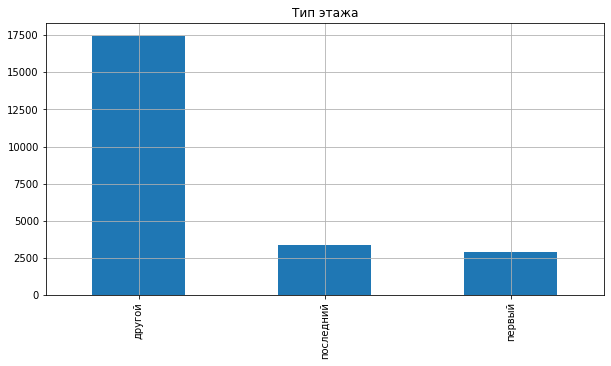

In [68]:
data['floor_kind'].value_counts().plot.bar(figsize=(10, 5), grid=True, title='Тип этажа')
plt.show()

Из полученной диаграммы следует, что наибольшее количсетво квартир расположено между первым и последним этажем. Наименьшее количество квартир на первом этаже, но оно близко по величине к количеству квартир на последнем этаже.

# Общее количество этажей в доме

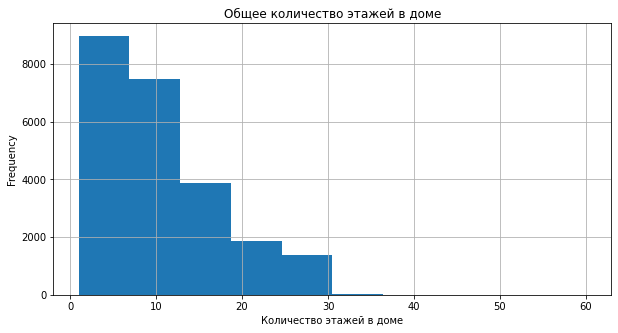

In [69]:
data['floors_total'].plot(kind='hist', bins=10, figsize=(10, 5), grid=True, title='Общее количество этажей в доме');
plt.xlabel('Количество этажей в доме');

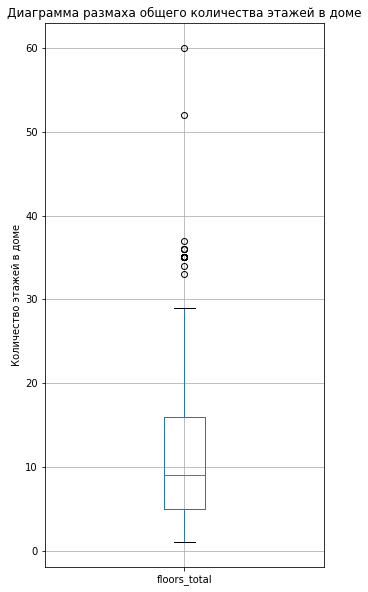

In [70]:
plt.figure(figsize=(5, 10))
data.boxplot(column=['floors_total']);
plt.title('Диаграмма размаха общего количества этажей в доме');
plt.ylabel('Количество этажей в доме');

In [71]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Минимальное количество этажей в доме = 1, максимально количество = 60. Среднее количество этажей = 10. Отбросим значения больше 33.

In [72]:
good_data = data.query('floors_total <= 33')
round((len(data[data['floors_total'] > 33])/len(data))*100, 2)

0.13

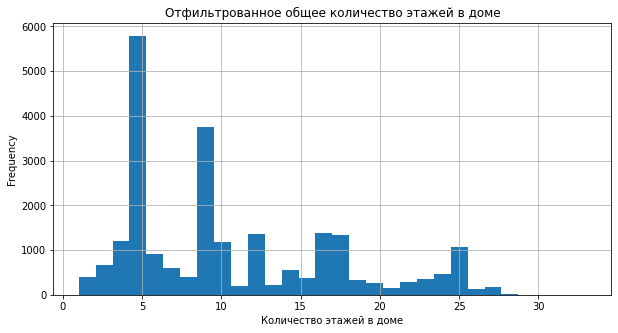

In [73]:
good_data['floors_total'].plot(kind='hist', bins=30, figsize=(10, 5), grid=True, title='Отфильтрованное общее количество этажей в доме');
plt.xlabel('Количество этажей в доме');

In [74]:
good_data['floors_total'].median()

9.0

Наибольшее число квартир продаются в пяти- и девятиэтажных домах. Медиана равна 9.

# Расстояние до центра города

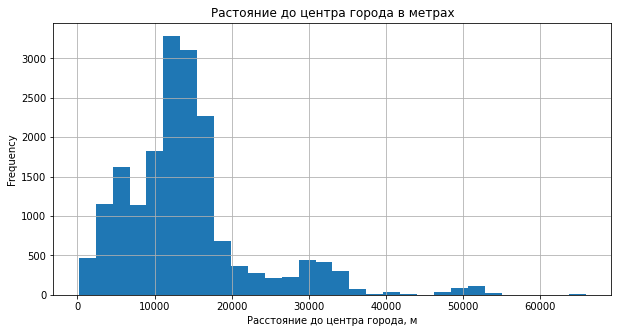

In [75]:
data['city_centers_nearest'].plot(kind='hist', bins=30, figsize=(10, 5), grid=True, title='Растояние до центра города в метрах');
plt.xlabel('Расстояние до центра города, м');

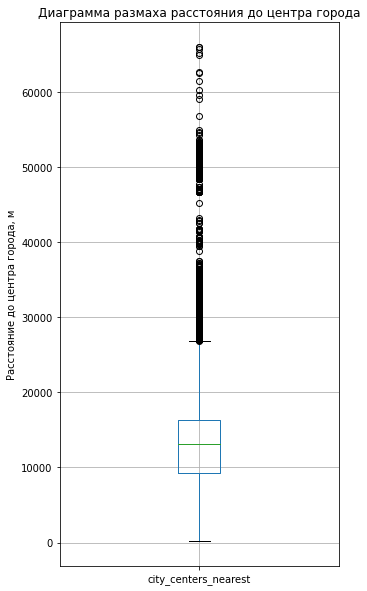

In [76]:
plt.figure(figsize=(5, 10))
data.boxplot(column=['city_centers_nearest']);
plt.title('Диаграмма размаха расстояния до центра города');
plt.ylabel('Расстояние до центра города, м');

In [77]:
data['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Минимальное расстояние до центра города - 181 м., максимально - 66 км. Среднее значение - 14 км. Отбрасываем расстояние больше 26876 м.

In [78]:
good_data = data.query('city_centers_nearest <= 37000')
round((len(data[data['city_centers_nearest'] > 37000])/len(data))*100, 2)

1.34

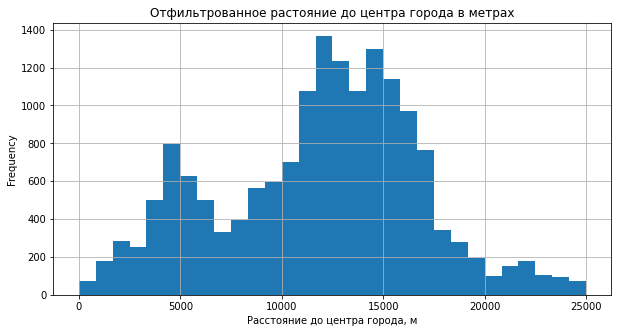

In [79]:
good_data['city_centers_nearest'].plot(kind='hist', bins=30, figsize=(10, 5), grid=True, range=(0, 25000), title='Отфильтрованное растояние до центра города в метрах');
plt.xlabel('Расстояние до центра города, м');

In [80]:
good_data['city_centers_nearest'].median()

12995.0

Большинство квартир расположено на расстоянии 10-17 км. от центра, далее идут квартиры, расположенные на расстоянии 3-6 км. от центра города. Сильно реже встречаются квартиры удаленные на 20 км. и дальше. Медиана равна 12995 м.

# Расстояние до ближайшего парка

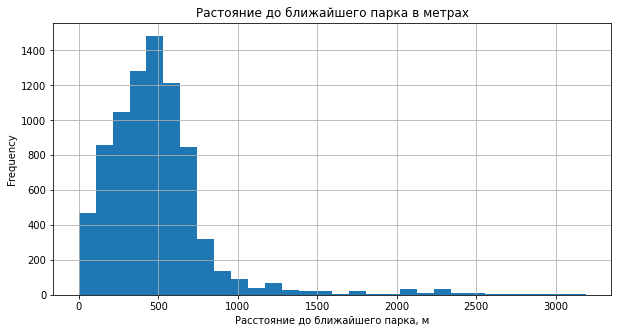

In [81]:
data['parks_nearest'].plot(kind='hist', bins=30, figsize=(10, 5), grid=True, title='Растояние до ближайшего парка в метрах');
plt.xlabel('Расстояние до ближайшего парка, м');

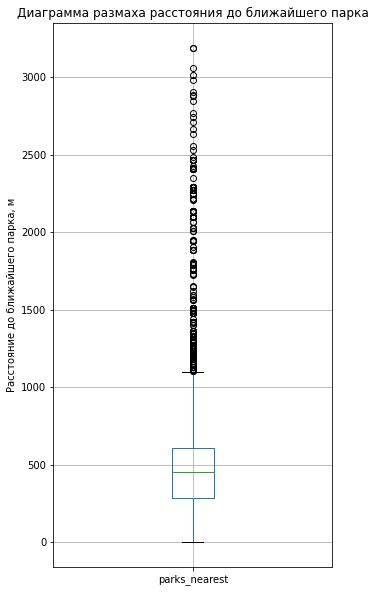

In [82]:
plt.figure(figsize=(5, 10))
data.boxplot(column=['parks_nearest']);
plt.title('Диаграмма размаха расстояния до ближайшего парка');
plt.ylabel('Расстояние до ближайшего парка, м');

In [83]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Минимальное расстояние до парка - 1 м., максимальное - 3190 м., среднее значение - 490 м. Отбрасываем значения больше 1098 м.

In [84]:
good_data = data.query('parks_nearest <= 1098')
round((len(data[data['parks_nearest'] > 1098])/len(data))*100, 2)

1.32

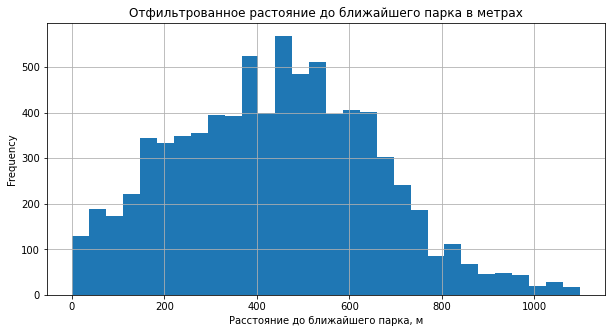

In [85]:
good_data['parks_nearest'].plot(kind='hist', bins=30, figsize=(10, 5), grid=True, title='Отфильтрованное растояние до ближайшего парка в метрах');
plt.xlabel('Расстояние до ближайшего парка, м');

In [86]:
good_data['parks_nearest'].median()

441.0

Большое количество квартир имеет ближайший парк на расстояниии 300 - 700 м. Медианное значение - 441 м.

# Длительность размещения объявления

Изучим, как быстро продавались квартиры. Для этого необходимо построить гистограмму, найти среднее значение и медиану. На основе этих данных можно будет сделать вывод о сорости продажи квартир.

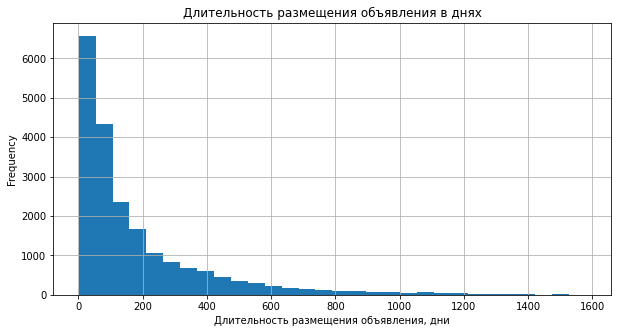

In [87]:
data['days_exposition'].plot(kind='hist', bins=30, figsize=(10, 5), grid=True, title='Длительность размещения объявления в днях');
plt.xlabel('Длительность размещения объявления, дни');

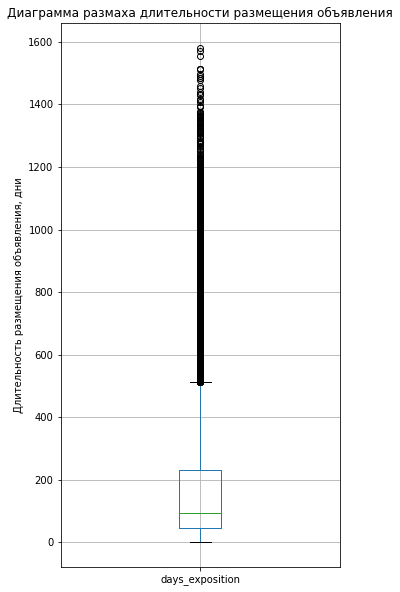

In [88]:
plt.figure(figsize=(5, 10))
data.boxplot(column=['days_exposition']);
plt.title('Диаграмма размаха длительности размещения объявления');
plt.ylabel('Длительность размещения объявления, дни');

In [89]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Минимальное количество дней размещения объявления - 1, максимальное - 1580 (это 4 с лишним года!). Среднее количество дней - 180. Отбросим значения больще 513.

In [90]:
good_data = data.query('days_exposition <= 1000')
round((len(data[data['days_exposition'] > 1000])/len(data))*100, 2)

1.16

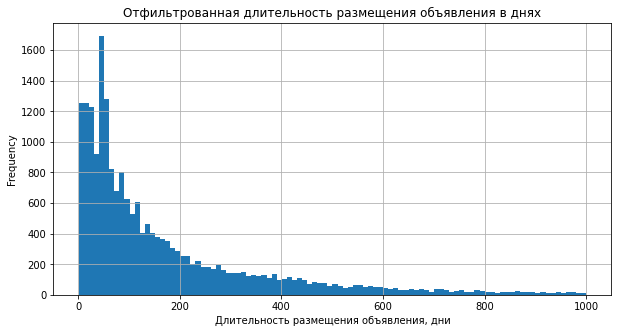

In [91]:
good_data['days_exposition'].plot(kind='hist', bins=100, figsize=(10, 5), grid=True, title='Отфильтрованная длительность размещения объявления в днях');
plt.xlabel('Длительность размещения объявления, дни');

После того, как убрали выбросы все же остался длиный хвост на гистограмме. С ним сложно проводить оценку. Зададим диапазон количества дней от 0 до 100.

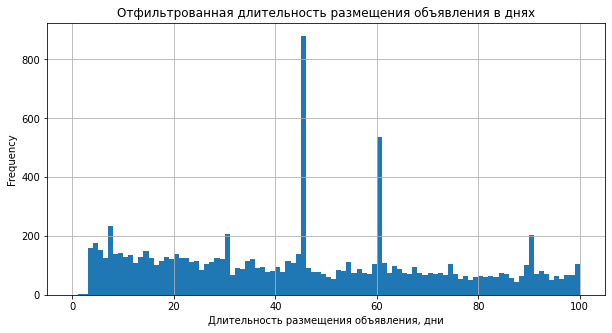

In [92]:
good_data['days_exposition'].plot(kind='hist', bins=100, figsize=(10, 5), range=(0, 100), grid=True, title='Отфильтрованная длительность размещения объявления в днях');
plt.xlabel('Длительность размещения объявления, дни');

Посчитаем среднее значение и медиану:

In [93]:
good_data['days_exposition'].median()

93.0

In [94]:
round(good_data['days_exposition'].mean(), 2)

167.41

Самая распространенная длительность размещения объявления - 45 дней, далее идет - 60 дней. Также есть небольшие всплески в районе 5, 30, 90 дней. Среднее значение - 167.41 дней, медиана - 93. Исходя из описательных данных быстрой можно назвать продажу до 45 дней, а медленной от 232 дней.

# Влияние  различных факторов на общую стоимость объекта

В данном разделе определим факторы, которые больше всего влияют на общую стоимость объекта. Для этого выведем значения корреляции, построим диаграммы рассеяния. Также, выведем матрицу диаграмм рассеяния.

In [95]:
good_data = data.query('total_area <= 300 and living_area <= 175 and kitchen_area <= 40 and last_price <= 50000000 and 0 < rooms <= 6 and days_exposition <= 1000 and ceiling_height <= 3.5 and floors_total <= 33 and city_centers_nearest <= 37000 and parks_nearest <= 1098')


In [96]:
impact_on_cost = good_data.pivot_table(index='floor', values=['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms'])
impact_on_cost.corr()

,kitchen_area,last_price,living_area,rooms,total_area
kitchen_area,1.000000,0.721031,0.310232,0.039784,0.530175
last_price,0.721031,1.000000,0.814193,0.585987,0.915768
living_area,0.310232,0.814193,1.000000,0.931792,0.953111
rooms,0.039784,0.585987,0.931792,1.000000,0.835633
total_area,0.530175,0.915768,0.953111,0.835633,1.000000


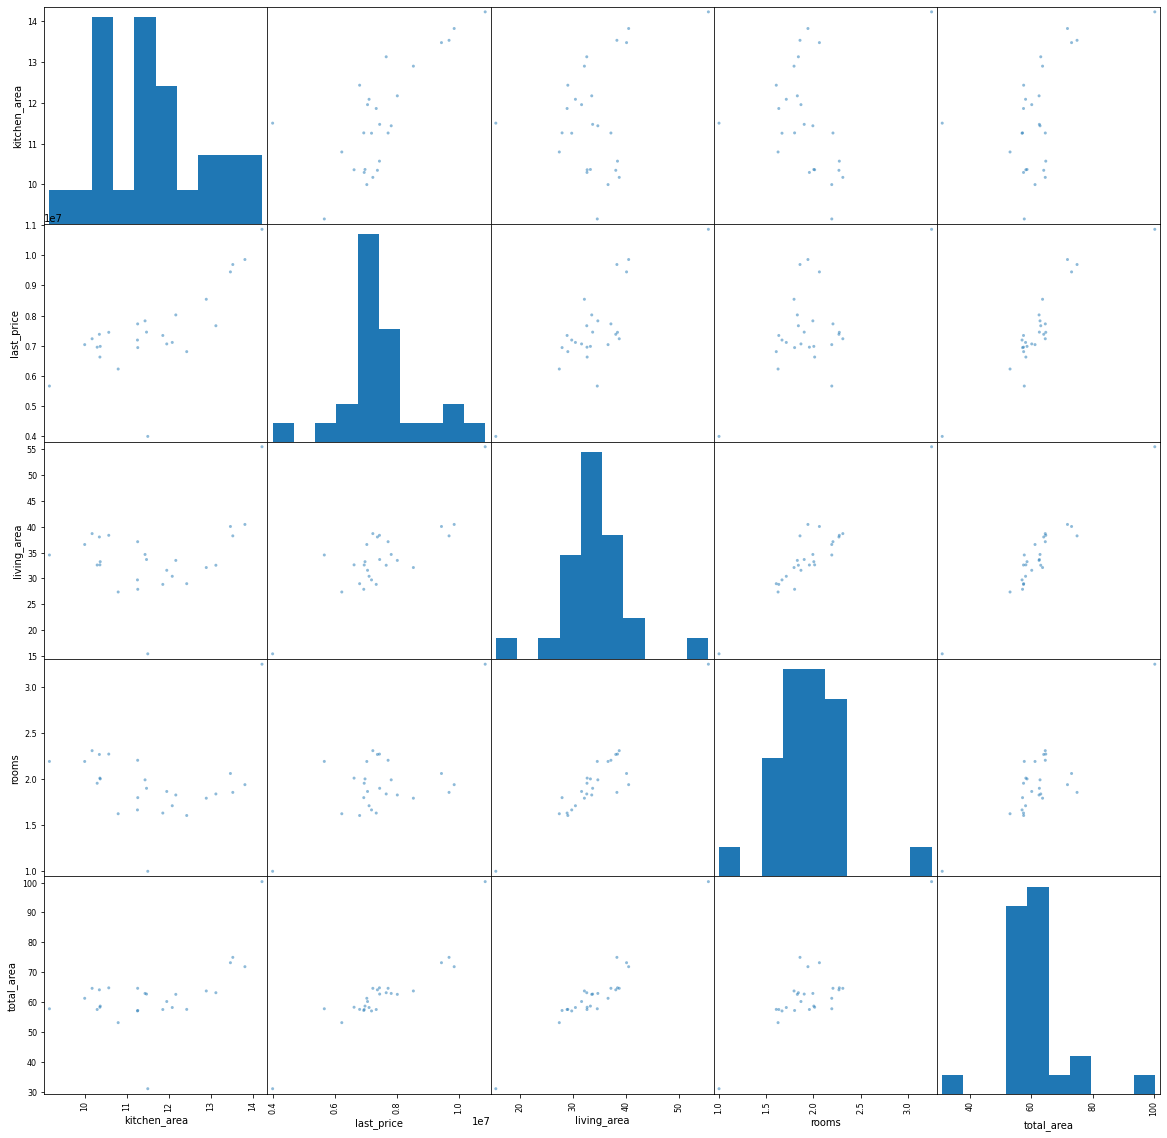

In [97]:
pd.plotting.scatter_matrix(impact_on_cost, figsize=(20, 20));

Далее, более детально изучим каждый фактор в отдельности.

# Общая площадь

Text(0, 0.5, 'Цена* 10 млн. руб.')

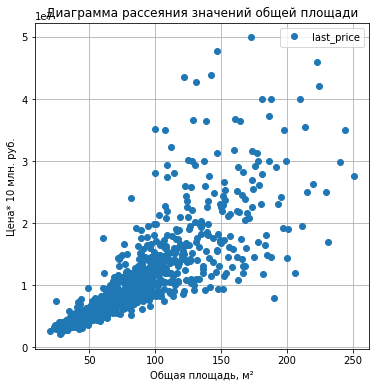

In [98]:
good_data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(6, 6));
plt.title('Диаграмма рассеяния значений общей площади')
plt.xlabel('Общая площадь, м²');
plt.ylabel('Цена* 10 млн. руб.')

Общая пллощадь квартиры показывает положительный, максимальный коэффициент корреляции по сравнению с остальными факторами (0.91). Это говорит о сильной связи с ценой объекта недвижимости. На диаграмме видно прямо пропорциональную связь, с увеличением общей площади квартиры увеличивается общая цена.

# Жилая площадь

Text(0, 0.5, 'Цена* 10 млн. руб.')

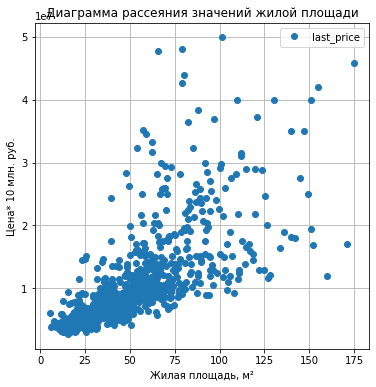

In [99]:
good_data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(6, 6));
plt.title('Диаграмма рассеяния значений жилой площади')
plt.xlabel('Жилая площадь, м²');
plt.ylabel('Цена* 10 млн. руб.')

У жилой площади коэффициент корреляции чуть меньше (0.81). Это говорит о более слабой зависимости цены от данного параметра. Но она все же есть. На графике видно, что с увеличением жилой площади увеличивается стоимость квартиры.

# Площадь кухни

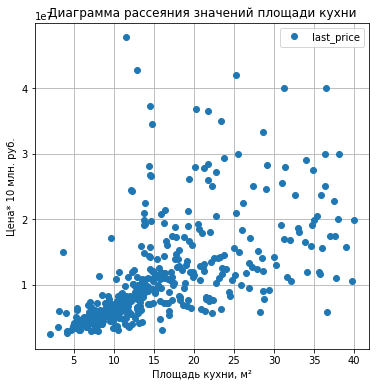

In [100]:
good_data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(6, 6));
plt.title('Диаграмма рассеяния значений площади кухни')
plt.xlabel('Площадь кухни, м²');
plt.ylabel('Цена* 10 млн. руб.');

Коэффициент корреляции площади кухни еще ниже, чем жилой площади и составляет 0.72. здесь наблюдается более слабая взамисвязь с ценой, чем у жилой площади, она прямо пропорциональна.

# Количество комнат

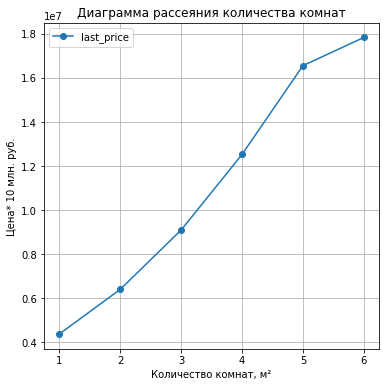

In [101]:
good_data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(6, 6));
plt.title('Диаграмма рассеяния количества комнат');
plt.xlabel('Количество комнат, м²');
plt.ylabel('Цена* 10 млн. руб.');

Коэффициент корреляции количества комнат и цены еще меньше, чем у жилой площади (0.59). Это говорит о слабой взаимосвязи велечин. С увеличением числа комнат увеличивается стоимость квартиры, но далеко не во всех случаях, это, возможно, обусловлено влиянием других факторов на зависимость.

# Тип этажа

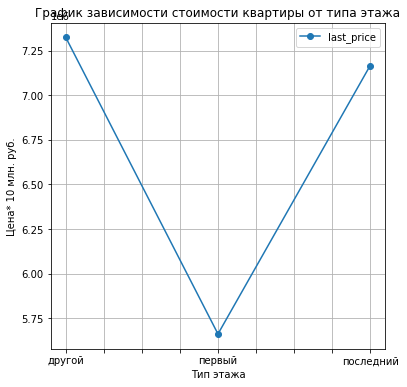

In [102]:
good_data.pivot_table(index='floor_kind', values='last_price').plot(grid=True, style='o-', figsize=(6, 6));
plt.title('График зависимости стоимости квартиры от типа этажа');
plt.xlabel('Тип этажа');
plt.ylabel('Цена* 10 млн. руб.');

По данному графику можно сделать вывод, что самые дорогие квартиры находятся между первым и последним этажем, чуть уступают квартиры на последнем этаже, а на первых этажах самые дешевае квартиры.

# День, месяц и год публикации

In [103]:
date_influence = good_data.pivot_table(index='days_exposition', values=['last_price', 'exposition_day', 'exposition_month', 'exposition_year'])
date_influence.corr()

,exposition_day,exposition_month,exposition_year,last_price
exposition_day,1.000000,0.016811,0.048411,-0.103923
exposition_month,0.016811,1.000000,-0.175422,-0.012029
exposition_year,0.048411,-0.175422,1.000000,-0.071226
last_price,-0.103923,-0.012029,-0.071226,1.000000


Исходя из описательных данных можно сделать вывод, что у всех параметров зависимость очень слабая, т.к. коэффициенты корреляции близки к нулю.

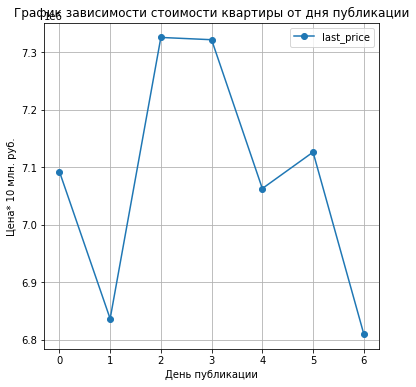

In [104]:
good_data.pivot_table(index='exposition_day', values='last_price').plot(grid=True, style='o-', figsize=(6, 6));
plt.title('График зависимости стоимости квартиры от дня публикации');
plt.xlabel('День публикации');
plt.ylabel('Цена* 10 млн. руб.');

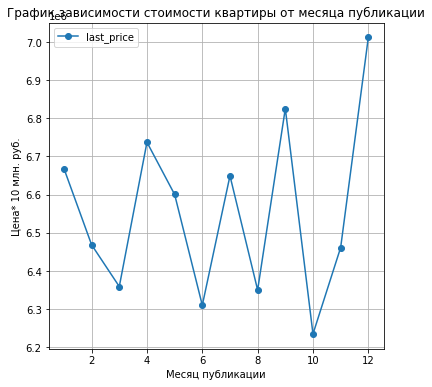

In [105]:
data.pivot_table(index='exposition_month', values='last_price').plot(grid=True, style='o-', figsize=(6, 6));
plt.title('График зависимости стоимости квартиры от месяца публикации');
plt.xlabel('Месяц публикации');
plt.ylabel('Цена* 10 млн. руб.');

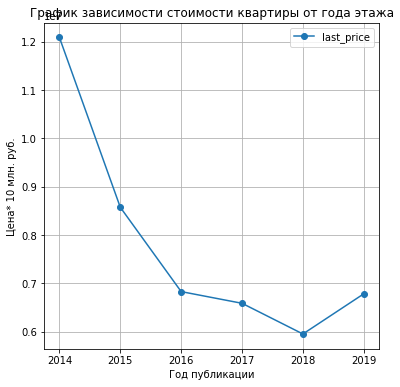

In [106]:
data.pivot_table(index='exposition_year', values='last_price').plot(grid=True, style='o-', figsize=(6, 6));
plt.title('График зависимости стоимости квартиры от года этажа');
plt.xlabel('Год публикации');
plt.ylabel('Цена* 10 млн. руб.');

Представленные графики подтверждают отсутствие зависимость между ценой и днем, месяцем, годом публикации. Можно лишь отметить, что дороже всего объявления, выставленные по субботам, в декабре и 2014 году.

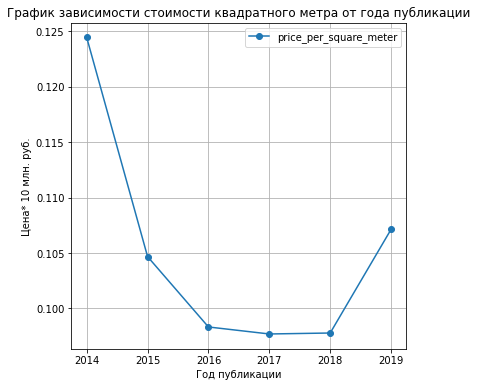

In [107]:
data.pivot_table(index='exposition_year', values='price_per_square_meter').plot(grid=True, style='o-', figsize=(6, 6));
plt.title('График зависимости стоимости квадратного метра от года публикации');
plt.xlabel('Год публикации');
plt.ylabel('Цена* 10 млн. руб.');

На графике максимальная стоимость квадратного метра отмечена в 2014 году, далее- до 2016 года идет спад стоимости. С 2016 по 2018 год цена почти не изменялась, а с 2018 года начался рост.

# Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Вывели информацию о 10 населенных пунктах с наибольшим числом объявлений.

In [108]:
top_ten_locality_name = data['locality_name'].value_counts().head(10)
top_ten_locality_name

Санкт-Петербург      15721
поселок Мурино         590
Кудрово                472
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
Выборг                 237
Name: locality_name, dtype: int64

In [109]:
data_price_square_meter = round(data.query('locality_name in @top_ten_locality_name.index').pivot_table(index='locality_name', values='price_per_square_meter'), 2)
data_price_square_meter.sort_values(by='price_per_square_meter', ascending=False)

,price_per_square_meter
locality_name,
Санкт-Петербург,0.11
Кудрово,0.10
Пушкин,0.10
поселок Мурино,0.09
поселок Парголово,0.09
Колпино,0.08
поселок Шушары,0.08
Всеволожск,0.07
Гатчина,0.07


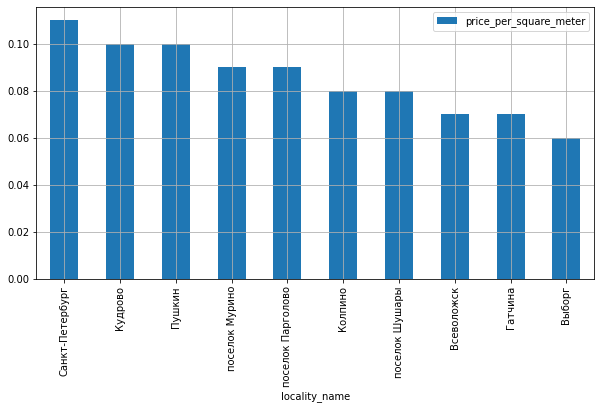

In [110]:
data_price_square_meter.sort_values(by='price_per_square_meter', ascending=False).plot.bar(figsize=(10, 5), grid=True)
plt.show()

Наибольшая средняя цена квадратного метра в Санкт-Петербурге - 114849 руб., на втором месте Пушкин - 103125 руб., далее идут Кудрово - 95324 руб., поселок Парголово - 90175 руб., поселок Мурино - 86087 руб., поселок Шушары - 78677 руб., Колпино - 75424 руб., Гатчина - 68746 руб., и замыкают список Всеволжск - 68654 руб. и Выборг - 58141 руб. вследствие своей удаленности от Санкт-петербурга.

# Cредняя стоимость на разном удалении от центра

In [111]:
data_spb = data.query('locality_name == "Санкт-Петербург"')
data_spb['city_centers_nearest_km'].describe()

count    15660.000000
mean        11.596041
std          4.863594
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: city_centers_nearest_km, dtype: float64

In [112]:
inf_city_centers_nearest = data_spb.pivot_table(index='city_centers_nearest_km', values='last_price')
inf_city_centers_nearest

,last_price
city_centers_nearest_km,
0.0,3.144912e+07
1.0,2.120672e+07
2.0,1.778832e+07
3.0,1.112658e+07
4.0,1.330428e+07
5.0,1.449912e+07
6.0,1.533842e+07
7.0,1.477515e+07
8.0,9.957717e+06


In [113]:
round(data_spb.pivot_table(index='city_centers_nearest_km', values='price_per_square_meter'), 2)

,price_per_square_meter
city_centers_nearest_km,
0.0,0.25
1.0,0.18
2.0,0.16
3.0,0.12
4.0,0.13
5.0,0.14
6.0,0.15
7.0,0.16
8.0,0.13


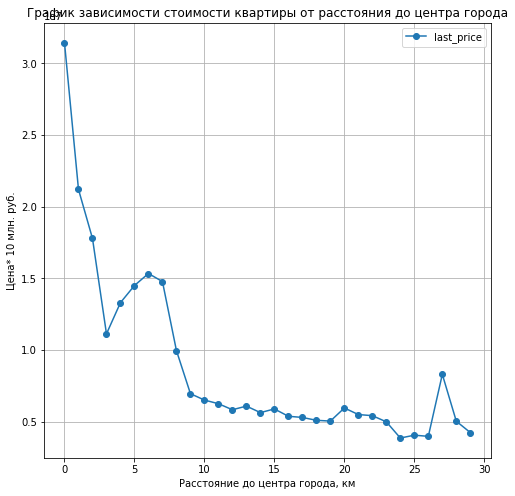

In [114]:
inf_city_centers_nearest.plot(grid=True, style='-o', figsize=(8, 8));
plt.title('График зависимости стоимости квартиры от расстояния до центра города');
plt.xlabel('Расстояние до центра города, км');
plt.ylabel('Цена* 10 млн. руб.');

Из полученных данных и графика видно, что стоимость квартиры сильно падает по мере удаления от центра города, так происходит до 9 км. Далее зависимость очень слаба, и стоимость не особо меняется. Есть два пика в районе  7 км 27 км от центра, они могут быть обусловлены влиянием других факторов.

### Напишите общий вывод

# Общий вывод

В данной проектной работы был проведен исследовательский анализ архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.
 - В ходе предобработки данных были приведены названия столбцов к единому стилю, обработаны пропуски и неявные дубликаты, также был изменен тип некоторых данных на более корректный.
 - Для удобства проведения анализа были добавлены дополнительные столбцы: "цена одного квадратного метра", "день недели публикации объявления", "месяц публикации объявления", "год публикации объявления", "тип этажа квартиры", "расстояние до центра города в километрах".
 - Далее, были изучены разные параметры объектов недвижимости и обработаны аномальные значения. Наибольшее количество квартир имеет общую площадь 45 кв.м., жилую площадь 17 кв.м., площадь кухни 8 кв.м., цену в 3.5 млн.руб. Самые распространенные объекты - однокомнатные квартиры с высотой потолков 2.65 м., расположенные между первым и последним этажем в пятиэтажках, с расстоянием до центра города 15 км., с расстоянием до ближайшего парка 450 м. 
 - Затем, была изучена скорость продажи квартир. Обычно длительность размещения объявления составляет 45 дней. Бустрой продажу можно назвать длительностью до 45 дней, а медленной  - длительностью от 232 дней.
 - Также были выявлены факторы, которые больше всего влияют на общую стоимость квартиры. Наибольшее влияние на цену оказывают: общая площадь и площадь кухни. Слабое влияние имеют параметры: жилая площадь и количество комнат. День, месяц и год публикации объявления почти никак не влияют на стоимость квартиры. Также, было установлено, что более дорогими являются квартиры, расположенные между первым и последним этажем.
 - Была посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Наибольшая средняя цена квадратного метра в Санкт-Петербурге - 114849 руб., на втором месте Пушкин - 103125 руб., далее идут Кудрово - 95324 руб., поселок Парголово - 90175 руб., поселок Мурино - 86087 руб., поселок Шушары - 78677 руб., Колпино - 75424 руб., Гатчина - 68746 руб., и замыкают список Всеволжск - 68654 руб. и Выборг - 58141 руб. вследствие своей удаленности от Санкт-петербурга.
 - Была посчитана средняя цена квартир на разном удалении от центра. Стоимость квартиры сильно падает по мере удаления от центра города, так происходит до 9 км. Далее зависимость очень слаба, и стоимость не особо меняется.